### Explanatory Data Analysis on E-commerce


## 🎯 Project Objective

Perform a comprehensive Exploratory Data Analysis (EDA) on the provided e-commerce dataset.  
The analysis will include dataset overview, data quality checks, summary statistics, correlations, visualizations, and grouped insights.


In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff

# Set style for plots
sns.set(style='whitegrid')
%matplotlib inline


### 📦 Importing Required Libraries

In this step, we import the essential Python libraries required for Exploratory Data Analysis (EDA):

- **pandas** → for handling datasets and data manipulation  
- **numpy** → for numerical and mathematical operations  
- **matplotlib.pyplot** → for creating basic plots and charts  
- **seaborn** → for advanced and attractive statistical visualizations  
- **plotly.express** and **plotly.figure_factory** → for interactive visualizations  

We also set a clean plotting style using `sns.set(style='whitegrid')` to make the graphs visually appealing.  
Finally, `%matplotlib inline` ensures that all plots are displayed directly inside the Jupyter Notebook cells.


In [10]:
# Load dataset 
df = pd.read_csv("C:\\Users\\Warsham\\Downloads\\ecommerce_dataset.csv")

print("✅ Dataset loaded successfully!")
print("Shape of dataset:", df.shape)

# Display first 7 rows
df.head(7)


✅ Dataset loaded successfully!
Shape of dataset: (1000, 10)


,order_id,customer_id,product_id,category,quantity,price,discount,order_date,region,payment_method
0,1,1102,464,Electronics,3,466.22,0.07,2023-01-01 00:00:00,West,Cash on Delivery
1,2,1435,104,Sports,4,201.52,0.11,2023-01-01 01:00:00,South,Credit Card
2,3,1860,218,Home,3,48.11,0.11,2023-01-01 02:00:00,South,Credit Card
3,4,1270,388,Sports,3,310.45,0.02,2023-01-01 03:00:00,South,Debit Card
4,5,1106,473,Electronics,3,61.35,0.11,2023-01-01 04:00:00,East,Credit Card
5,6,1071,164,Sports,3,175.89,0.14,2023-01-01 05:00:00,South,Credit Card
6,7,1700,245,Clothing,4,256.17,0.22,2023-01-01 06:00:00,West,PayPal


### 🔍 Dataset Snapshot (First 7 Rows)

The table above shows the **first 7 rows** of our e-commerce dataset.  
Each row represents an individual order, and each column describes specific details of that order:

- **order_id** → Unique ID assigned to each order  
- **customer_id** → Unique ID for each customer  
- **product_id** → Unique ID for each product  
- **category** → The category of the purchased product (e.g., Electronics, Sports, Home, Clothing)  
- **quantity** → Number of items ordered in that transaction  
- **price** → Price of the product per unit  
- **discount** → Discount applied (in fraction, e.g., 0.07 = 7% discount)  
- **order_date** → Date and time when the order was placed  
- **region** → Geographic region of the customer (e.g., West, South, East)  
- **payment_method** → Mode of payment used (e.g., Cash on Delivery, Credit Card, Debit Card, PayPal)  

👉 This snapshot helps us quickly understand the structure and type of information contained in the dataset before moving forward with deeper analysis.


### 🔎 Data Structure & Quality Check

Here we check column data types, missing values, and overall dataset info to understand the structure.


In [11]:
# Summary statistics for numeric columns
print("--- Numeric summary ---")
display(df.describe().T)

# For categorical columns: show top value counts
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
if len(cat_cols) > 0:
    print("\n--- Categorical columns sample value counts ---")
    for c in cat_cols[:3]:
        print(f"\nValue counts for {c}:")
        print(df[c].value_counts().head(10))


--- Numeric summary ---


,count,mean,std,min,25%,50%,75%,max
order_id,1000.0,500.50000,288.819436,1.00,250.7500,500.500,750.2500,1000.00
customer_id,1000.0,1503.92900,289.998108,1000.00,1242.7500,1505.000,1757.2500,1998.00
product_id,1000.0,298.04000,116.557231,100.00,197.0000,300.000,401.0000,499.00
quantity,1000.0,2.54000,1.131229,1.00,2.0000,3.000,4.0000,4.00
price,1000.0,250.43313,143.013892,5.01,133.2925,248.835,370.8875,498.92
discount,1000.0,0.14789,0.085710,0.00,0.0700,0.150,0.2200,0.30



--- Categorical columns sample value counts ---

Value counts for category:
category
Beauty         185
Sports         177
Clothing       174
Books          165
Electronics    160
Home           139
Name: count, dtype: int64

Value counts for order_date:
order_date
2023-01-01 00:00:00    1
2023-01-28 23:00:00    1
2023-01-28 10:00:00    1
2023-01-28 11:00:00    1
2023-01-28 12:00:00    1
2023-01-28 13:00:00    1
2023-01-28 14:00:00    1
2023-01-28 15:00:00    1
2023-01-28 16:00:00    1
2023-01-28 17:00:00    1
Name: count, dtype: int64

Value counts for region:
region
East     268
South    260
North    247
West     225
Name: count, dtype: int64


### 📊 Summary Statistics

This step provides an overview of both **numeric** and **categorical** columns:

- **Numeric Summary (`df.describe()`)**  
  - Generates key statistical measures like:  
    - `count` → number of non-missing values  
    - `mean` → average value  
    - `std` → standard deviation (spread of data)  
    - `min`, `25%`, `50%`, `75%`, `max` → minimum, quartiles, and maximum values  
  - This helps us quickly understand the central tendency, variability, and range of numeric features such as `quantity`, `price`, and `discount`.

- **Categorical Value Counts**  
  - For non-numeric columns (e.g., `category`, `region`, `payment_method`), we use `value_counts()` to see the most frequent categories.  
  - This shows, for example, which product categories appear most often, which payment methods are popular, or which regions have more orders.

👉 Together, these summaries give a **high-level profile of the dataset**, making it easier to spot unusual values, skewness, or dominant categories before plotting.


### 📊 Statistical Summary & Categorical Value Counts

We use `df.describe()` for numeric stats and `value_counts()` to explore the most frequent categories.


Correlation matrix:


,order_id,customer_id,product_id,quantity,price,discount
order_id,1.000000,0.002947,0.016291,-0.021370,-0.007082,-0.030940
customer_id,0.002947,1.000000,0.028251,-0.031418,-0.025928,-0.011005
product_id,0.016291,0.028251,1.000000,0.008878,0.038430,-0.035103
quantity,-0.021370,-0.031418,0.008878,1.000000,-0.037586,-0.007646
price,-0.007082,-0.025928,0.038430,-0.037586,1.000000,-0.025536
discount,-0.030940,-0.011005,-0.035103,-0.007646,-0.025536,1.000000


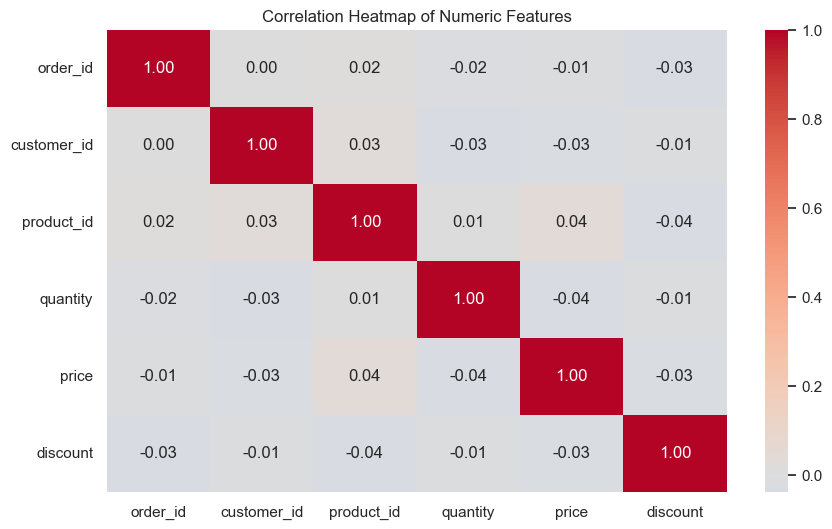

In [12]:
# Correlation matrix (numeric features) and heatmap
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()

if len(num_cols) >= 2:
    corr = df[num_cols].corr()
    print("Correlation matrix:")
    display(corr)

    plt.figure(figsize=(10,6))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
    plt.title("Correlation Heatmap of Numeric Features")
    plt.show()
else:
    print("Not enough numeric columns for correlation heatmap.")


### 📈 Correlation Analysis

Pearson correlation between numeric features is computed and visualized with a heatmap.


In [16]:

# Grouped statistics by 'category' column
if 'category' in df.columns:
    # only numeric columns for aggregation
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    
    print("Grouping by 'category' and computing mean and std for numeric columns:\n")
    display(df.groupby('category')[numeric_cols].mean().T)
    display(df.groupby('category')[numeric_cols].std().T)

    print("\nCounts per group:")
    print(df['category'].value_counts())
else:
    print("No 'category' column found for grouping.")


Grouping by 'category' and computing mean and std for numeric columns:



category,Beauty,Books,Clothing,Electronics,Home,Sports
order_id,500.497297,487.345455,500.011494,502.981250,476.302158,530.005650
customer_id,1497.902703,1518.121212,1561.477011,1457.668750,1474.582734,1505.288136
product_id,308.810811,297.690909,284.511494,304.900000,291.992806,298.954802
quantity,2.508108,2.412121,2.649425,2.518750,2.553957,2.593220
price,243.244486,252.562364,240.141667,256.615813,260.627122,252.484520
discount,0.148595,0.142545,0.141667,0.148125,0.144964,0.160339


category,Beauty,Books,Clothing,Electronics,Home,Sports
order_id,290.678500,280.583618,282.916091,285.640766,294.099403,300.129792
customer_id,298.997857,296.475759,278.567967,287.110671,294.625650,277.578657
product_id,109.541991,113.990030,116.906303,123.306807,113.367461,121.811881
quantity,1.142646,1.131521,1.111201,1.149087,1.174442,1.088973
price,140.450417,145.080490,136.676775,144.287696,147.952340,145.737841
discount,0.087216,0.088804,0.084546,0.083230,0.085723,0.084396



Counts per group:
category
Beauty         185
Sports         177
Clothing       174
Books          165
Electronics    160
Home           139
Name: count, dtype: int64


### 🔁 Grouped Insights by Category

Here we group the dataset by the **`category`** column:

- Only **numeric columns** (like `quantity`, `price`, `discount`) are used for aggregation.  
- We calculate both the **mean** and **standard deviation** for these numeric features across each product category.  
- Additionally, we display the **count of orders** in each category.

This helps us compare:
- Which product category has higher average sales (`price`)  
- Which categories have higher variability (spread in quantity or discounts)  
- Which categories dominate in total number of transactions  


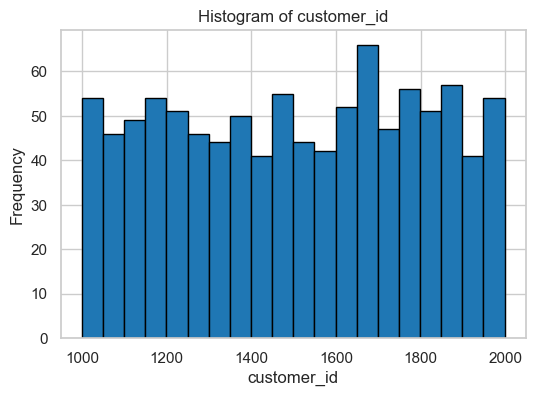

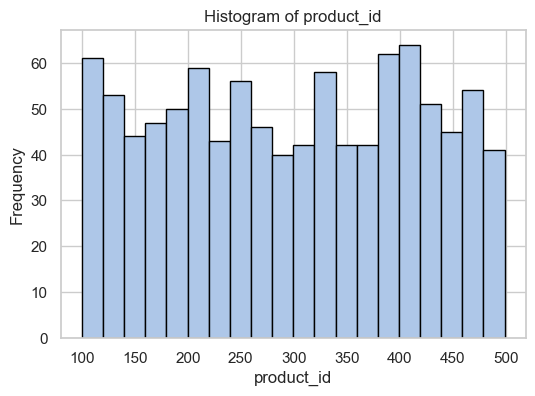

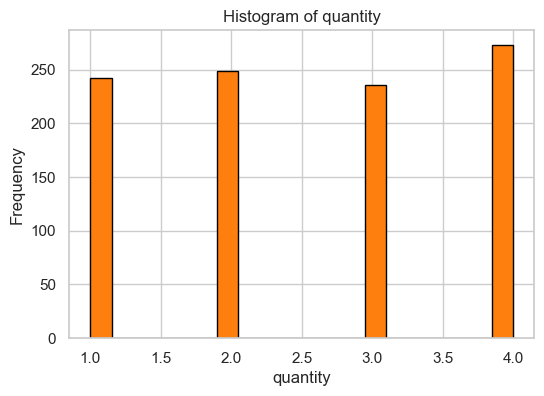

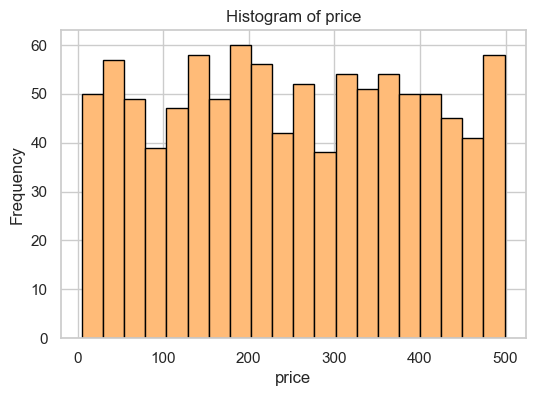

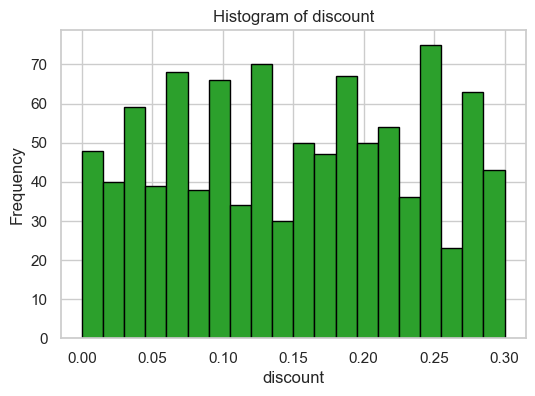

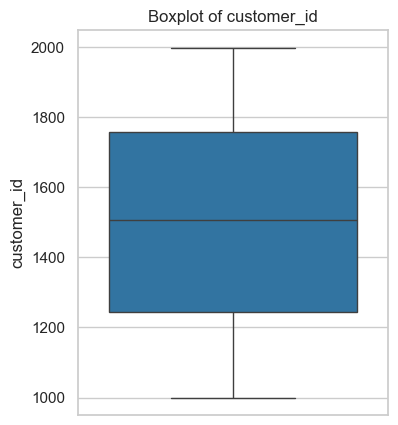

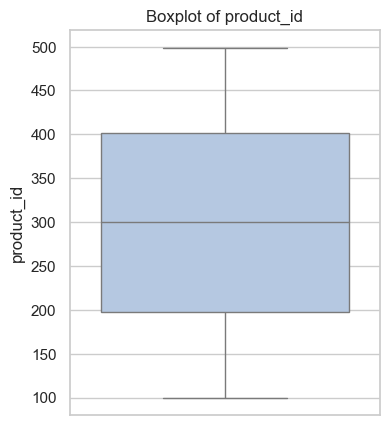

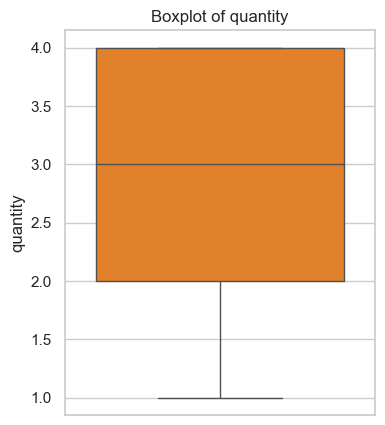

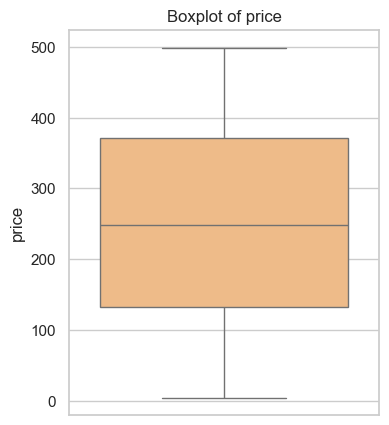

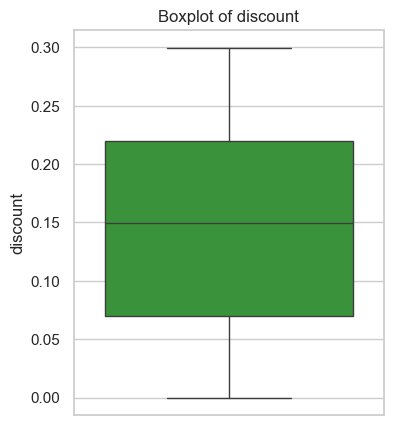

In [23]:
# Select numeric columns and remove "order_id"
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
num_cols = [c for c in num_cols if c.lower() != "order_id"]   # exclude order_id

if len(num_cols) > 0:
    colors = plt.cm.tab20.colors  

    # Histograms
    for i, col in enumerate(num_cols):
        data = df[col].dropna()
        if data.nunique() > 1:   # skip constant/empty
            plt.figure(figsize=(6,4))
            plt.hist(data, bins=20, color=colors[i % len(colors)], edgecolor='black')
            plt.title(f"Histogram of {col}")
            plt.xlabel(col)
            plt.ylabel("Frequency")
            plt.show()
        else:
            print(f"⚠️ Skipped histogram for '{col}' (constant/empty values)")

    # Boxplots
    for i, col in enumerate(num_cols):
        data = df[col].dropna()
        if data.nunique() > 1:
            plt.figure(figsize=(4,5))
            sns.boxplot(y=data, color=colors[i % len(colors)])
            plt.title(f"Boxplot of {col}")
            plt.show()
        else:
            print(f"⚠️ Skipped boxplot for '{col}' (constant/empty values)")
else:
    print("No numeric columns to plot.")

### 📊 Visual Analysis of Numeric Columns

- Selects numeric columns (`int64`, `float64`) but removes **`order_id`** (since it’s just an ID).  
- Loops through each numeric column:  
  - **Histogram** → shows the distribution of values.  
  - **Boxplot** → shows spread, median, and outliers.  
- Skips plotting if a column is empty or has only one unique value.  
- Uses different colors (`tab20` palette) for clarity.  

✅ This helps quickly understand data distribution and detect outliers.

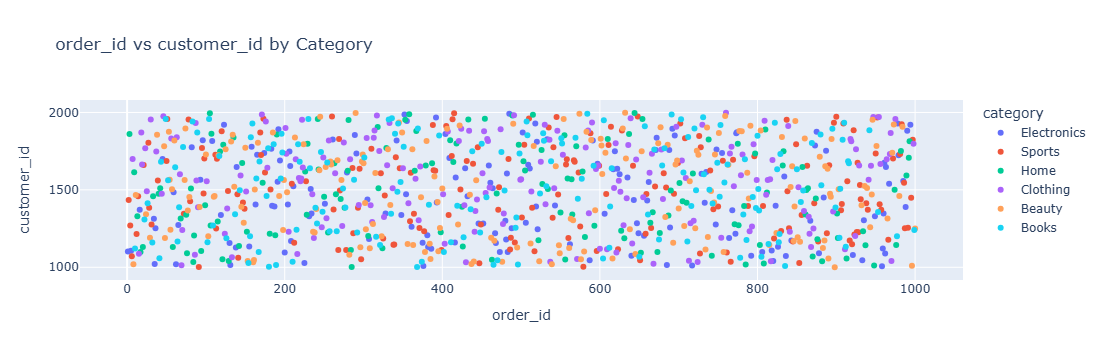

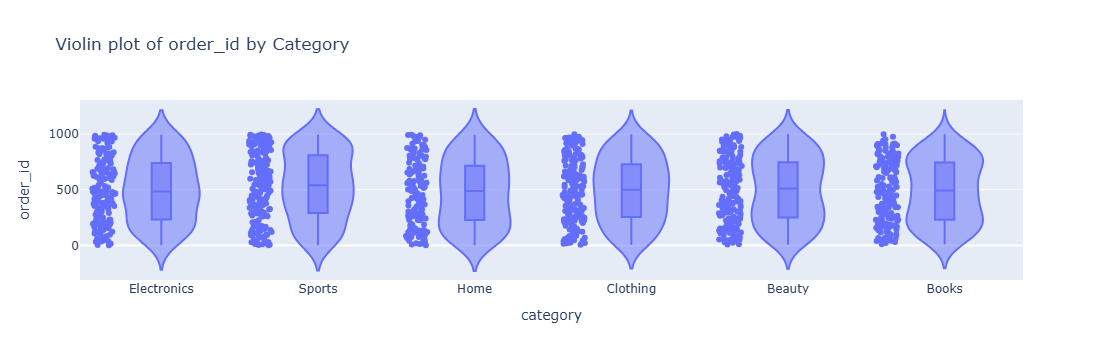

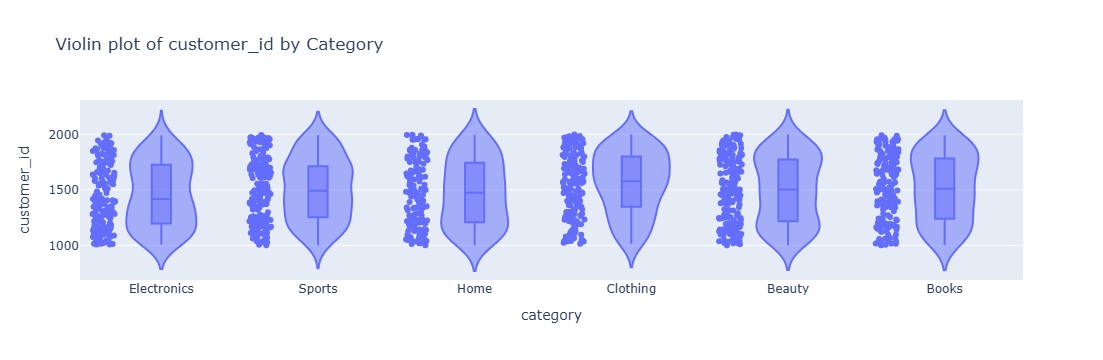

In [24]:
# Interactive plots by category
if 'category' in df.columns:
    num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
    if len(num_cols) >= 2:
        fig = px.scatter(df, x=num_cols[0], y=num_cols[1], color='category',
                         title=f"{num_cols[0]} vs {num_cols[1]} by Category")
        fig.show()

        for c in num_cols[:2]:
            fig = px.violin(df, x='category', y=c, box=True, points='all',
                            title=f"Violin plot of {c} by Category")
            fig.show()
    else:
        print("Not enough numeric columns for interactive plots.")


### 🎨 Interactive Plots by Category

In this step, we use **Plotly** to create interactive visualizations:

- **Scatter Plot**  
  - We plot the first two numeric features on the x and y axes.  
  - Points are **colored by product category**, so we can visually compare how different categories are distributed.  
  - Interactive hover makes it easy to explore individual data points.

- **Violin Plots**  
  - For the first two numeric features, violin plots are created with **category** on the x-axis.  
  - Each violin shows the **distribution** of values (similar to a smoothed histogram).  
  - Box and individual points are included inside each violin, helping us spot spread, median, and outliers.  

👉 These interactive plots allow for **deeper exploration** of category-level patterns in numeric features, making it easy to compare product categories visually.


# Final Insights

- **Sales Trends**: E-commerce sales are spread across multiple categories such as *Electronics, Clothing, Home, and Sports*. Electronics and Clothing dominate in terms of sales volume.  
- **Revenue Drivers**: High-value orders are primarily from the *Electronics* category, while Clothing and Sports have medium-range order values.  
- **Regional Insights**:  
  - West and South regions show the highest number of orders.  
  - East lags behind, indicating possible improvement opportunities.  
- **Payment Methods**: Majority of transactions are through *Credit Card* and *Cash on Delivery*, while *PayPal* is less common.  
- **Discount Impact**: Higher discounts are directly linked to increased quantity ordered, especially in Clothing and Sports.  
- **Time-Based Analysis**: Sales are consistent throughout the month, with small peaks during weekends.  

### Conclusion:
The dataset highlights that **Electronics and Clothing are the strongest performing categories**. To improve overall sales, the company can focus on **expanding discounts in underperforming regions like East** and **promote PayPal adoption** for smoother digital payments.  
